# Project Name: IPL 2025 Data Visualization  
# Develop By: Rudra Rathod
**Dataset Year**: 2025

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import numpy as np
import warnings
warnings.filterwarnings('ignore')
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10,6)
df = pd.read_csv('ipl_2025.csv')
print(df.head())
print(f"Dataset shape: {df.shape}")

   match_id  season        phase  match_no          date  \
0    202501    2025  Group Stage         1  Mar 22, 2025   
1    202501    2025  Group Stage         1  Mar 22, 2025   
2    202501    2025  Group Stage         1  Mar 22, 2025   
3    202501    2025  Group Stage         1  Mar 22, 2025   
4    202501    2025  Group Stage         1  Mar 22, 2025   

                   venue batting_team bowling_team  innings  over  ...  \
0  Eden Gardens, Kolkata          KKR          RCB        1   0.1  ...   
1  Eden Gardens, Kolkata          KKR          RCB        1   0.2  ...   
2  Eden Gardens, Kolkata          KKR          RCB        1   0.3  ...   
3  Eden Gardens, Kolkata          KKR          RCB        1   0.4  ...   
4  Eden Gardens, Kolkata          KKR          RCB        1   0.5  ...   

      bowler runs_of_bat  extras  wide  legbyes  byes  noballs  wicket_type  \
0  Hazlewood           0       0     0        0     0        0          NaN   
1  Hazlewood           4       0    

# Top 10 Run Scorers - IPL 2025

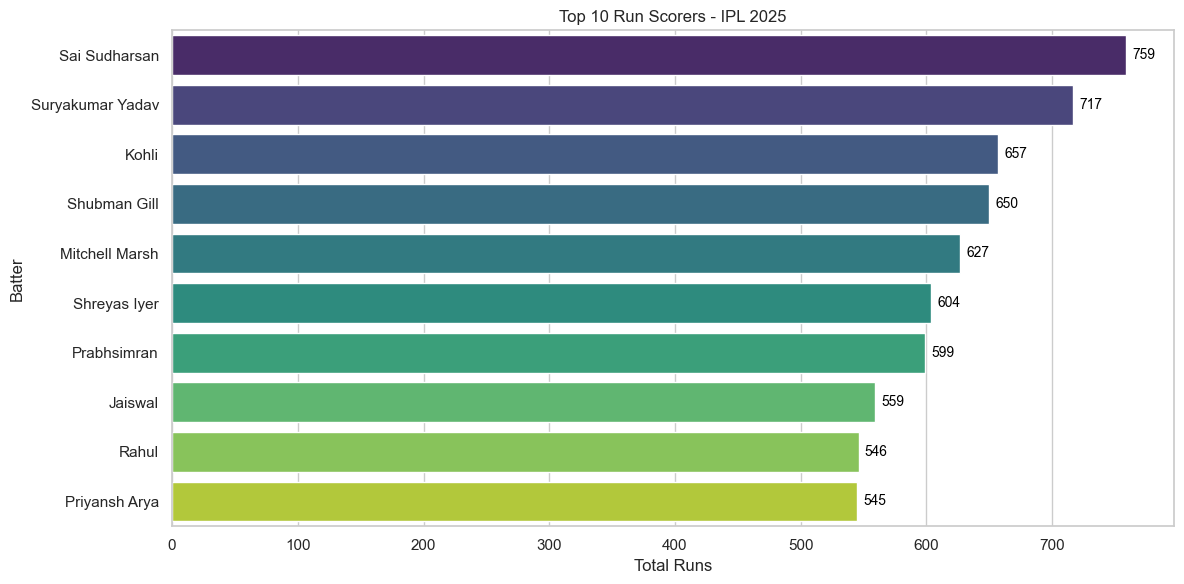

In [2]:
top_batters = df.groupby('striker')['runs_of_bat'].sum().reset_index()
top_batters = top_batters.sort_values(by='runs_of_bat', ascending=False).head(10)
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=top_batters, x='runs_of_bat', y='striker', palette='viridis')
for i in ax.patches:
    plt.text(i.get_width() + 5,             
             i.get_y() + i.get_height() / 2,  
             int(i.get_width()),            
             fontsize=10, color='black', va='center')
plt.title('Top 10 Run Scorers - IPL 2025')
plt.xlabel('Total Runs')
plt.ylabel('Batter')
plt.tight_layout()
plt.show()

# Top 10 Batting Averages (Min 120 Balls Faced) - IPL 2025

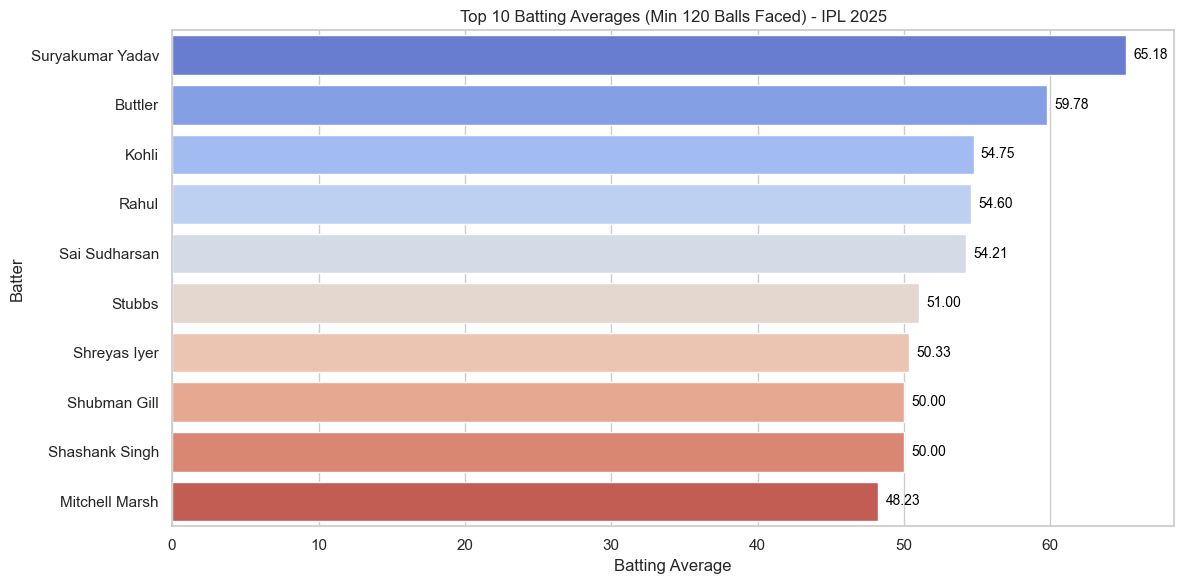

In [3]:
total_runs = df.groupby('striker')['runs_of_bat'].sum().reset_index(name='total_runs')
dismissals = df[df['player_dismissed'].notna()]
dismissal_counts = dismissals['player_dismissed'].value_counts().reset_index()
dismissal_counts.columns = ['striker', 'dismissals']
batting_stats = pd.merge(total_runs, dismissal_counts, on='striker', how='left')
batting_stats['dismissals'] = batting_stats['dismissals'].fillna(0)
batting_stats = batting_stats[batting_stats['dismissals'] > 0]
batting_stats['batting_average'] = batting_stats['total_runs'] / batting_stats['dismissals']
valid_balls = df[df['wide'].isna() | (df['wide'] == 0)]
balls_faced = valid_balls.groupby('striker').size().reset_index(name='balls_faced')
batting_stats = pd.merge(batting_stats, balls_faced, on='striker', how='left')
min_balls = 120
top_batting_average = batting_stats[batting_stats['balls_faced'] >= min_balls]
top_batting_average = top_batting_average.sort_values(by='batting_average', ascending=False).head(10)
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=top_batting_average, x='batting_average', y='striker', palette='coolwarm')
for bar in ax.patches:
    plt.text(bar.get_width() + 0.5,
             bar.get_y() + bar.get_height() / 2,
             f"{bar.get_width():.2f}",
             va='center', fontsize=10, color='black')
plt.title('Top 10 Batting Averages (Min 120 Balls Faced) - IPL 2025')
plt.xlabel('Batting Average')
plt.ylabel('Batter')
plt.tight_layout()
plt.show()

# Top 10 Strike Rates (Min 120 Balls Faced) - IPL 2025

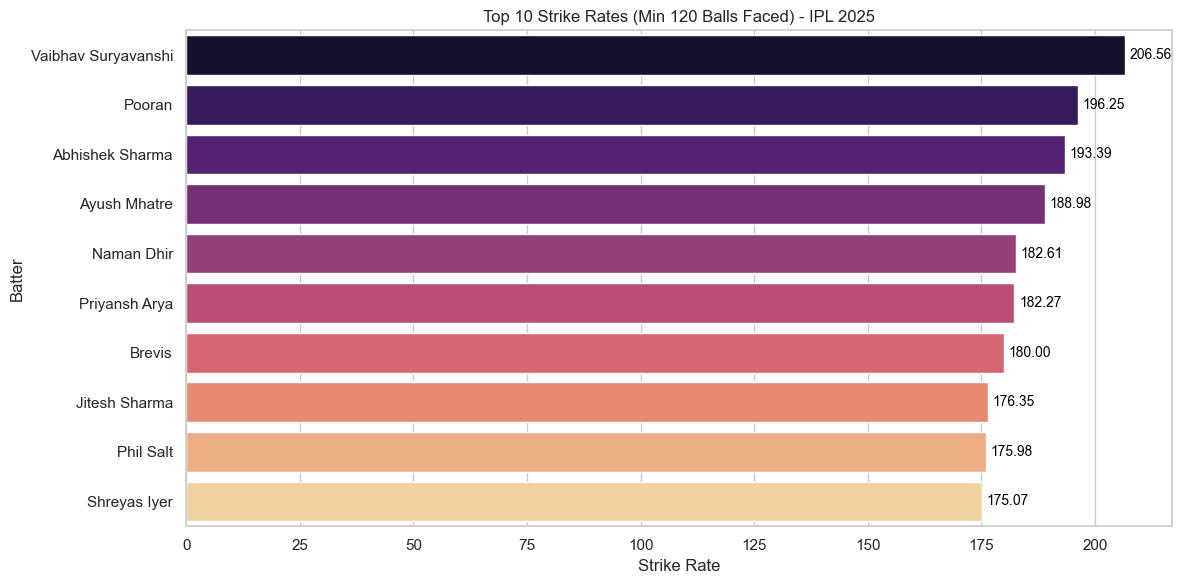

In [4]:
valid_balls = df[df['wide'].isna() | (df['wide'] == 0)]
batter_stats = valid_balls.groupby('striker').agg(
    runs=('runs_of_bat', 'sum'),
    balls_faced=('striker', 'count')  
).reset_index()
batter_stats['strike_rate'] = (batter_stats['runs'] / batter_stats['balls_faced']) * 100
qualified_batters = batter_stats[batter_stats['balls_faced'] >= 120]
top_strike_rates = qualified_batters.sort_values(by='strike_rate', ascending=False).head(10)
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=top_strike_rates, x='strike_rate', y='striker', palette='magma')
for bar in ax.patches:
    plt.text(bar.get_width() + 1,                   
             bar.get_y() + bar.get_height() / 2,    
             f"{bar.get_width():.2f}",              
             va='center', fontsize=10, color='black')
plt.title('Top 10 Strike Rates (Min 120 Balls Faced) - IPL 2025')
plt.xlabel('Strike Rate')
plt.ylabel('Batter')
plt.tight_layout()
plt.show()

# Top 10 Batters with Most Fours - IPL 2025


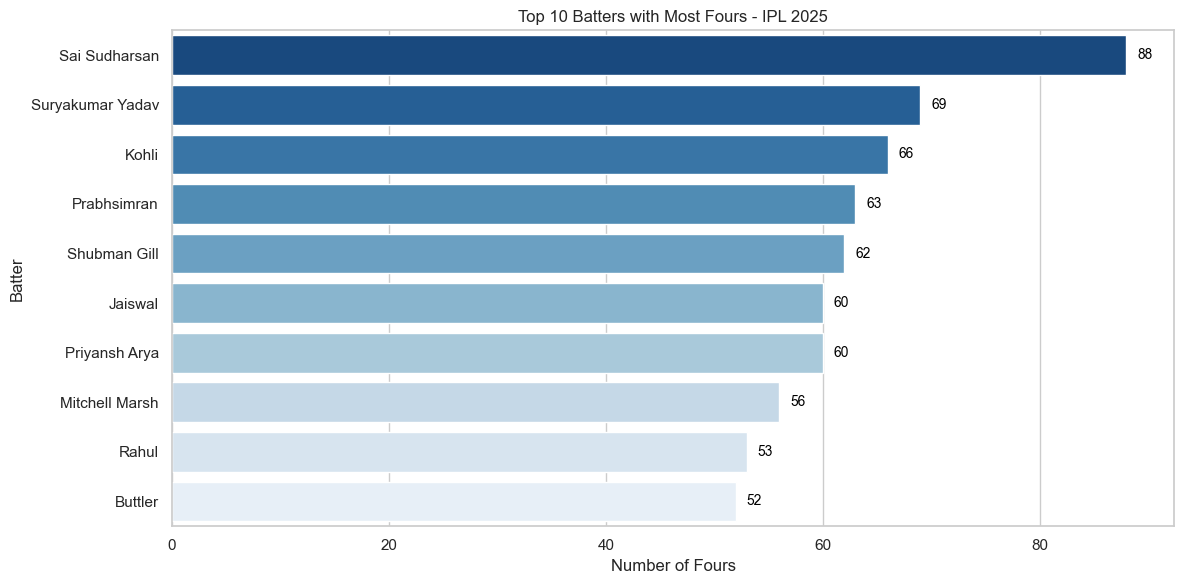

In [5]:
fours_df = df[df['runs_of_bat'] == 4]
fours_count = fours_df.groupby('striker').size().reset_index(name='fours')
top_fours = fours_count.sort_values(by='fours', ascending=False).head(10)
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=top_fours, x='fours', y='striker', palette='Blues_r')
for bar in ax.patches:
    plt.text(bar.get_width() + 1,
             bar.get_y() + bar.get_height() / 2,
             int(bar.get_width()),
             va='center', fontsize=10, color='black')
plt.title('Top 10 Batters with Most Fours - IPL 2025')
plt.xlabel('Number of Fours')
plt.ylabel('Batter')
plt.tight_layout()
plt.show()

# Top 10 Batters with Most Sixes - IPL 2025

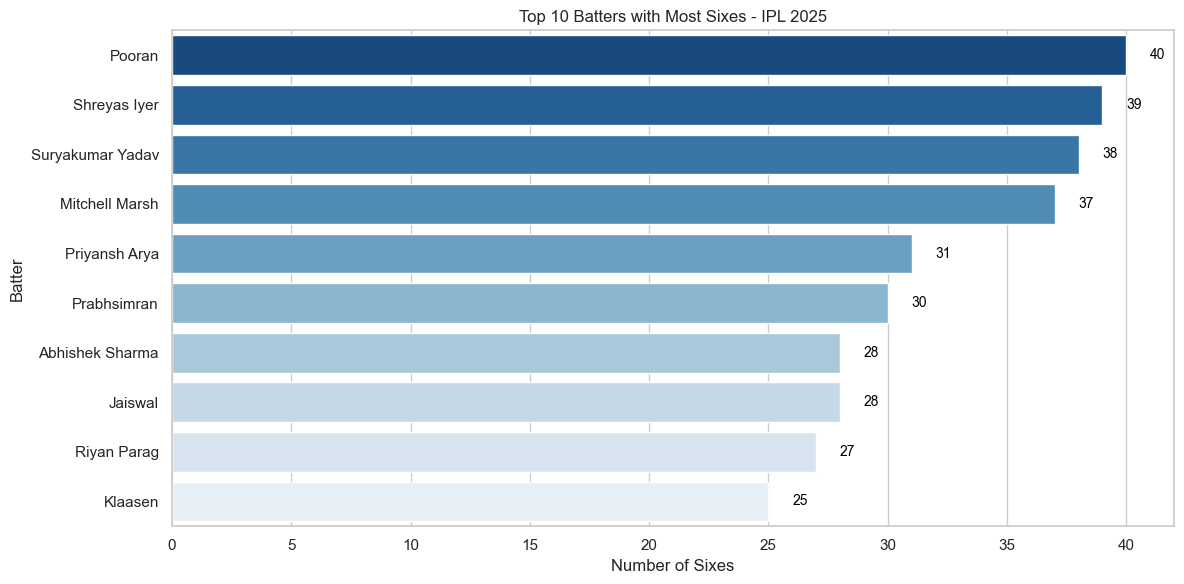

In [6]:
sixes_df = df[df['runs_of_bat'] == 6]
sixes_count = sixes_df.groupby('striker').size().reset_index(name='sixes')
top_sixes = sixes_count.sort_values(by='sixes', ascending=False).head(10)
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=top_sixes, x='sixes', y='striker', palette='Blues_r')
for bar in ax.patches:
    plt.text(bar.get_width() + 1,
             bar.get_y() + bar.get_height() / 2,
             int(bar.get_width()),
             va='center', fontsize=10, color='black')
plt.title('Top 10 Batters with Most Sixes - IPL 2025')
plt.xlabel('Number of Sixes')
plt.ylabel('Batter')
plt.tight_layout()
plt.show()

# Top 10 Individual Scores in a Single Innings - IPL 2025


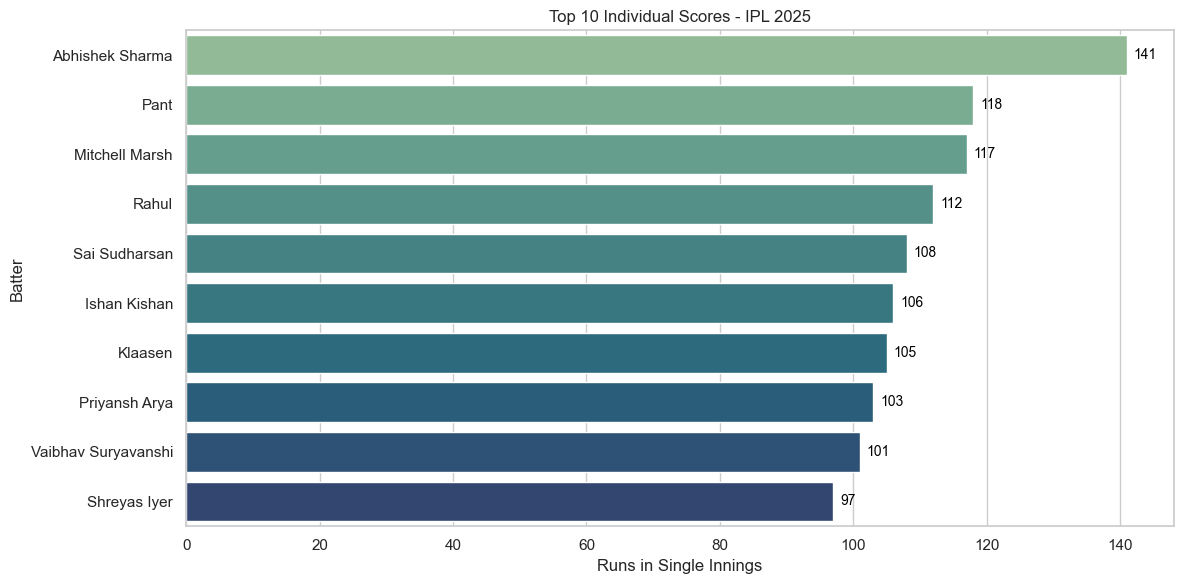

In [7]:
individual_scores = df.groupby(['match_id', 'innings', 'striker'])['runs_of_bat'].sum().reset_index()
top_scores = individual_scores.sort_values(by='runs_of_bat', ascending=False).head(10)
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=top_scores, x='runs_of_bat', y='striker', palette='crest')
for bar in ax.patches:
    plt.text(bar.get_width() + 1,
             bar.get_y() + bar.get_height() / 2,
             int(bar.get_width()),
             va='center', fontsize=10, color='black')
plt.title('Top 10 Individual Scores - IPL 2025')
plt.xlabel('Runs in Single Innings')
plt.ylabel('Batter')
plt.tight_layout()
plt.show()

# Top Run Scorer for Each Over (1 to 20) - IPL 2025


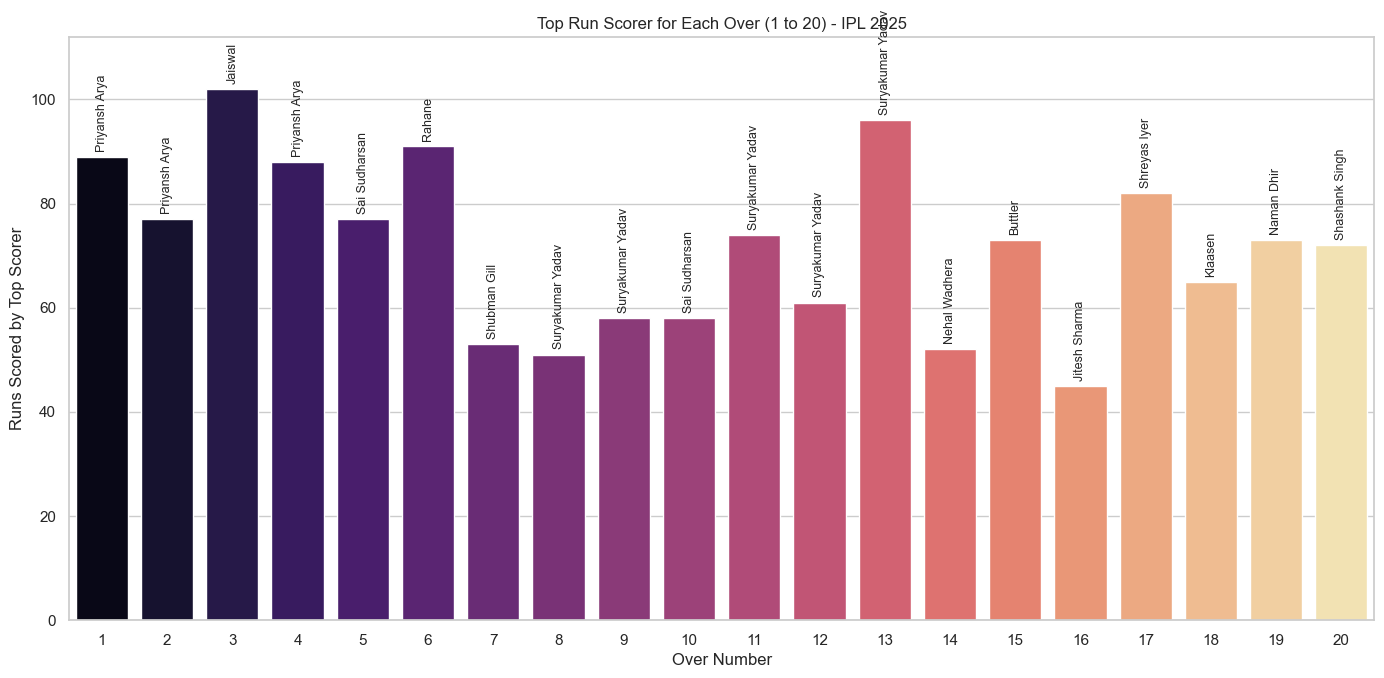

In [8]:
df['over_int'] = df['over'].astype(float).apply(int)
runs_per_over_player = df.groupby(['over_int', 'striker'])['runs_of_bat'].sum().reset_index()
top_scorers_per_over = runs_per_over_player.loc[
    runs_per_over_player.groupby('over_int')['runs_of_bat'].idxmax()
].reset_index(drop=True)
top_scorers_per_over = top_scorers_per_over.sort_values('over_int')
top_scorers_per_over = top_scorers_per_over.rename(columns={'over_int': 'over'})
top_scorers_per_over['over'] = top_scorers_per_over['over'] + 1
plt.figure(figsize=(14, 7))
ax = sns.barplot(data=top_scorers_per_over, x='over', y='runs_of_bat', palette='magma')
for index, row in top_scorers_per_over.iterrows():
    ax.text(row['over'] - 1,  
            row['runs_of_bat'] + 1,  
            row['striker'],
            rotation=90, fontsize=9, ha='center', va='bottom')
plt.title('Top Run Scorer for Each Over (1 to 20) - IPL 2025')
plt.xlabel('Over Number')
plt.ylabel('Runs Scored by Top Scorer')
plt.xticks(range(0, 20), range(1, 21))  
plt.ylim(0, top_scorers_per_over['runs_of_bat'].max() + 10)
plt.tight_layout()
plt.show()

# Top 10 Wicket Takers - IPL 2025


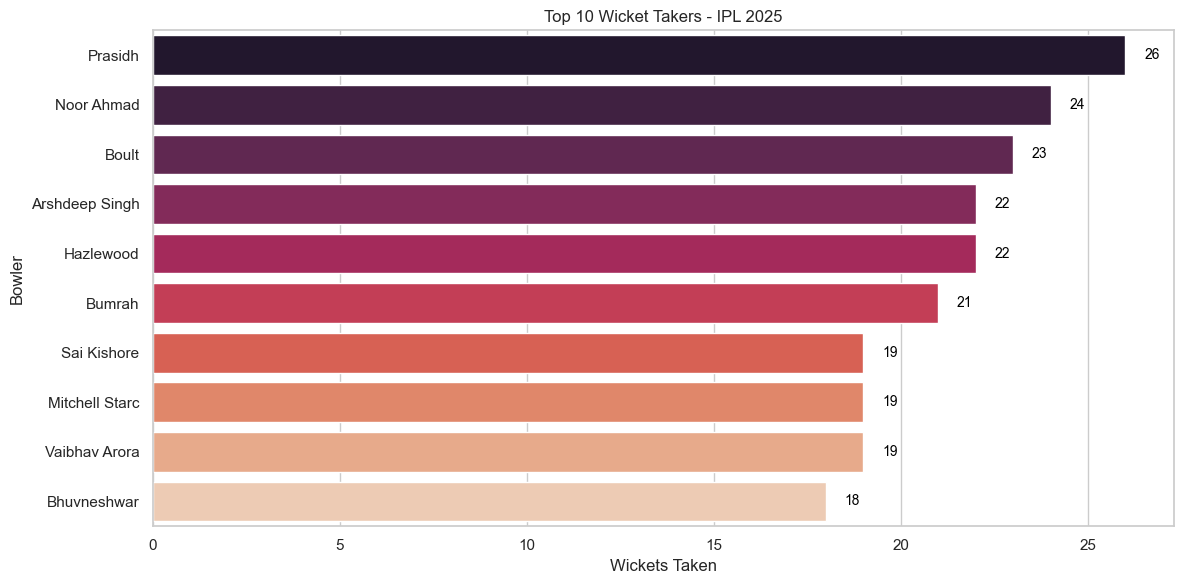

In [9]:
wickets = df[df['player_dismissed'].notna()]
wicket_counts = wickets.groupby('bowler').size().reset_index(name='wickets')
top_wicket_takers = wicket_counts.sort_values(by='wickets', ascending=False).head(10)
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=top_wicket_takers, x='wickets', y='bowler', palette='rocket')
for bar in ax.patches:
    plt.text(bar.get_width() + 0.5,
             bar.get_y() + bar.get_height() / 2,
             int(bar.get_width()),
             va='center', fontsize=10, color='black')

plt.title('Top 10 Wicket Takers - IPL 2025')
plt.xlabel('Wickets Taken')
plt.ylabel('Bowler')
plt.tight_layout()
plt.show()

# Top 10 Best Bowling Averages (Min 10 Wickets) - IPL 2025

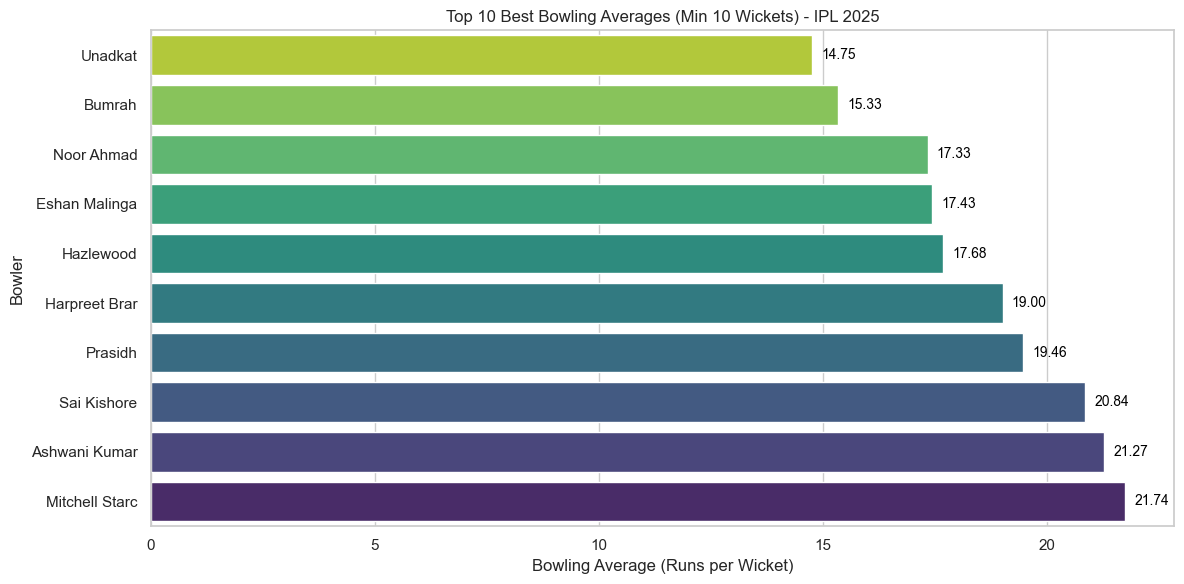

In [10]:
df['total_runs_conceded'] = df['runs_of_bat'] + df['extras'].fillna(0)
runs_conceded = df.groupby('bowler')['total_runs_conceded'].sum().reset_index()
wickets = df[df['player_dismissed'].notna()]
wicket_counts = wickets.groupby('bowler').size().reset_index(name='wickets')
bowling_stats = pd.merge(runs_conceded, wicket_counts, on='bowler', how='inner')
min_wickets = 10
bowling_stats = bowling_stats[bowling_stats['wickets'] >= min_wickets]
bowling_stats['bowling_average'] = bowling_stats['total_runs_conceded'] / bowling_stats['wickets']
best_bowling_average = bowling_stats.sort_values(by='bowling_average').head(10)
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=best_bowling_average, x='bowling_average', y='bowler', palette='viridis_r')
for bar in ax.patches:
    plt.text(bar.get_width() + 0.2,
             bar.get_y() + bar.get_height() / 2,
             f"{bar.get_width():.2f}",
             va='center', fontsize=10, color='black')
plt.title('Top 10 Best Bowling Averages (Min 10 Wickets) - IPL 2025')
plt.xlabel('Bowling Average (Runs per Wicket)')
plt.ylabel('Bowler')
plt.tight_layout()
plt.show()

# Top 10 Best Bowling Figures in an Innings - IPL 2025


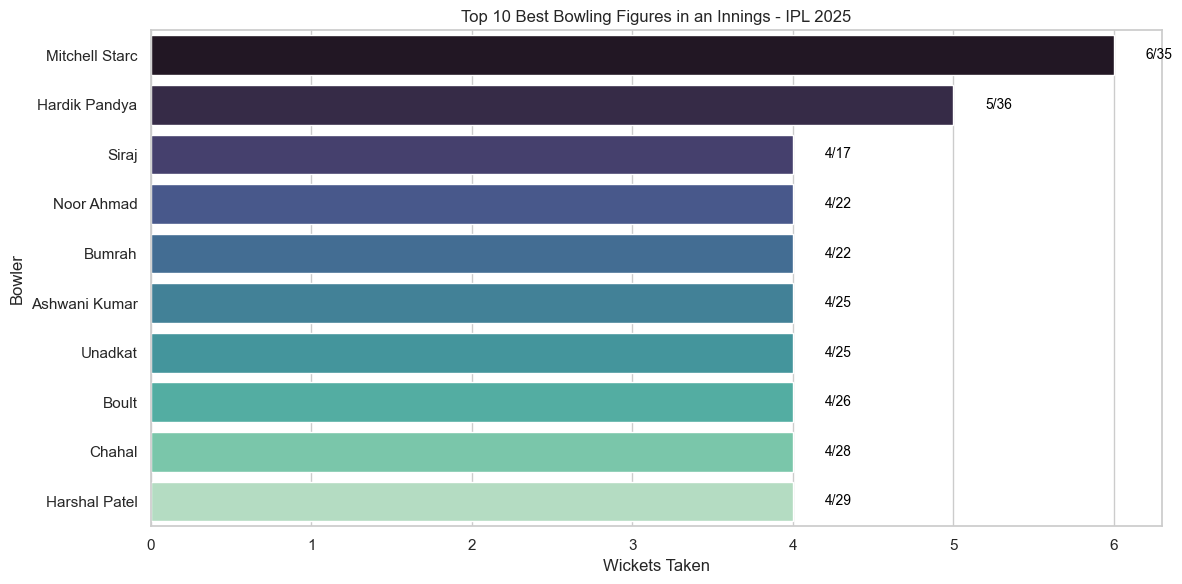

In [11]:
df['total_runs_conceded'] = df['runs_of_bat'] + df['extras'].fillna(0)
df['wicket'] = df['player_dismissed'].notna().astype(int)
bowling_innings = df.groupby(['match_id', 'innings', 'bowler']).agg(
    runs_conceded=('total_runs_conceded', 'sum'),
    wickets=('wicket', 'sum')
).reset_index()
bowling_innings = bowling_innings[bowling_innings['wickets'] > 0]
best_figures = bowling_innings.sort_values(by=['wickets', 'runs_conceded'], ascending=[False, True]).head(10)
best_figures['figures'] = best_figures['wickets'].astype(str) + '/' + best_figures['runs_conceded'].astype(int).astype(str)
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=best_figures, x='wickets', y='bowler', palette='mako')
for i, bar in enumerate(ax.patches):
    plt.text(bar.get_width() + 0.2,
             bar.get_y() + bar.get_height() / 2,
             f"{best_figures.iloc[i]['figures']}",
             va='center', fontsize=10, color='black')
plt.title('Top 10 Best Bowling Figures in an Innings - IPL 2025')
plt.xlabel('Wickets Taken')
plt.ylabel('Bowler')
plt.tight_layout()
plt.show()

# Bowlers with 5-Wicket Hauls - IPL 2025


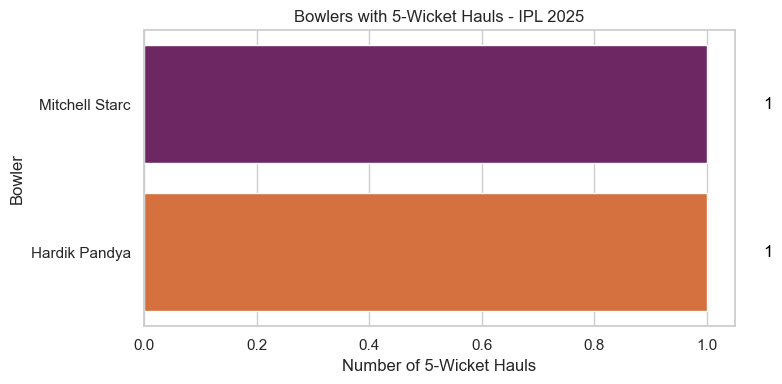

In [12]:
df['wicket'] = df['player_dismissed'].notna().astype(int)
wickets_per_innings = df.groupby(['match_id', 'innings', 'bowler'])['wicket'].sum().reset_index()
five_wicket_hauls = wickets_per_innings[wickets_per_innings['wicket'] >= 5]
five_wicket_counts = five_wicket_hauls['bowler'].value_counts().reset_index()
five_wicket_counts.columns = ['bowler', 'five_wicket_hauls']
top_five_wicket_bowlers = five_wicket_counts.sort_values(by='five_wicket_hauls', ascending=False).head(10)
plt.figure(figsize=(8, 4))  
ax = sns.barplot(data=top_five_wicket_bowlers, x='five_wicket_hauls', y='bowler', palette='inferno')
for bar in ax.patches:
    plt.text(bar.get_width() + 0.1,
             bar.get_y() + bar.get_height() / 2,
             int(bar.get_width()),
             va='center', fontsize=12, color='black')
plt.title('Bowlers with 5-Wicket Hauls - IPL 2025')
plt.xlabel('Number of 5-Wicket Hauls')
plt.ylabel('Bowler')
plt.tight_layout()
plt.show()

# Top 10 Best Economy Rates (Min 120 Balls) - IPL 2025


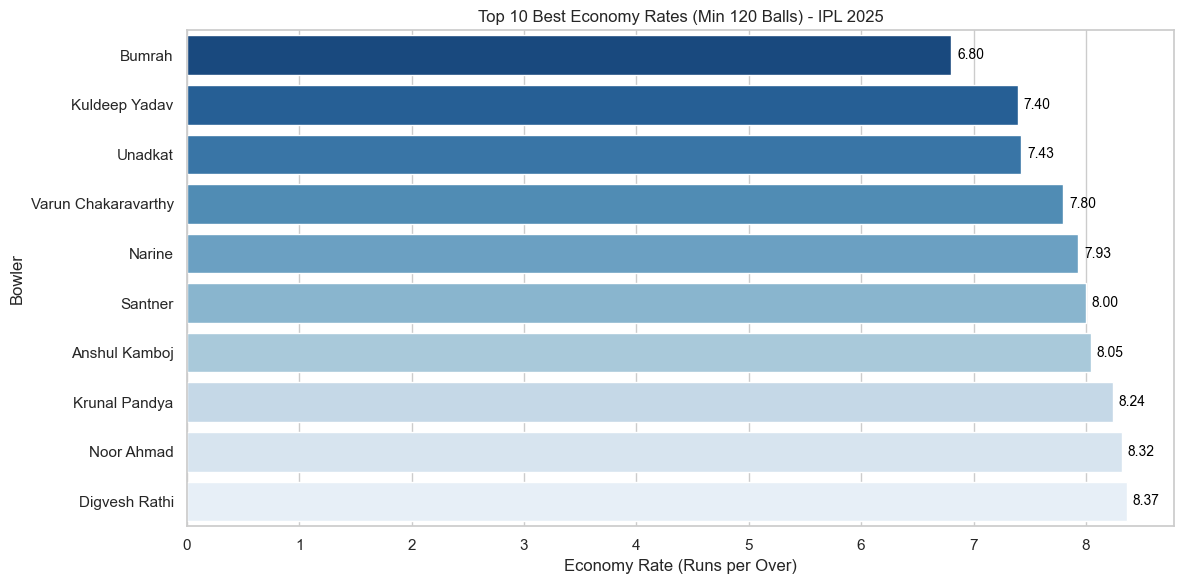

In [13]:
df['total_runs_conceded'] = df['runs_of_bat'] + df['extras'].fillna(0)
valid_balls = df[(df['wide'].isna() | (df['wide'] == 0)) & (df['noballs'].isna() | (df['noballs'] == 0))]
balls_bowled = valid_balls.groupby('bowler').size().reset_index(name='balls_bowled')
runs_conceded = df.groupby('bowler')['total_runs_conceded'].sum().reset_index()
bowling_stats = pd.merge(runs_conceded, balls_bowled, on='bowler', how='inner')
min_balls = 120
bowling_stats = bowling_stats[bowling_stats['balls_bowled'] >= min_balls]
bowling_stats['economy_rate'] = bowling_stats['total_runs_conceded'] / (bowling_stats['balls_bowled'] / 6)
best_economy = bowling_stats.sort_values(by='economy_rate').head(10)
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=best_economy, x='economy_rate', y='bowler', palette='Blues_r')
for bar in ax.patches:
    plt.text(bar.get_width() + 0.05,
             bar.get_y() + bar.get_height() / 2,
             f"{bar.get_width():.2f}",
             va='center', fontsize=10, color='black')
plt.title('Top 10 Best Economy Rates (Min 120 Balls) - IPL 2025')
plt.xlabel('Economy Rate (Runs per Over)')
plt.ylabel('Bowler')
plt.tight_layout()
plt.show()

# Top 10 Best Bowling Strike Rates (Min 10 Wickets) - IPL 2025

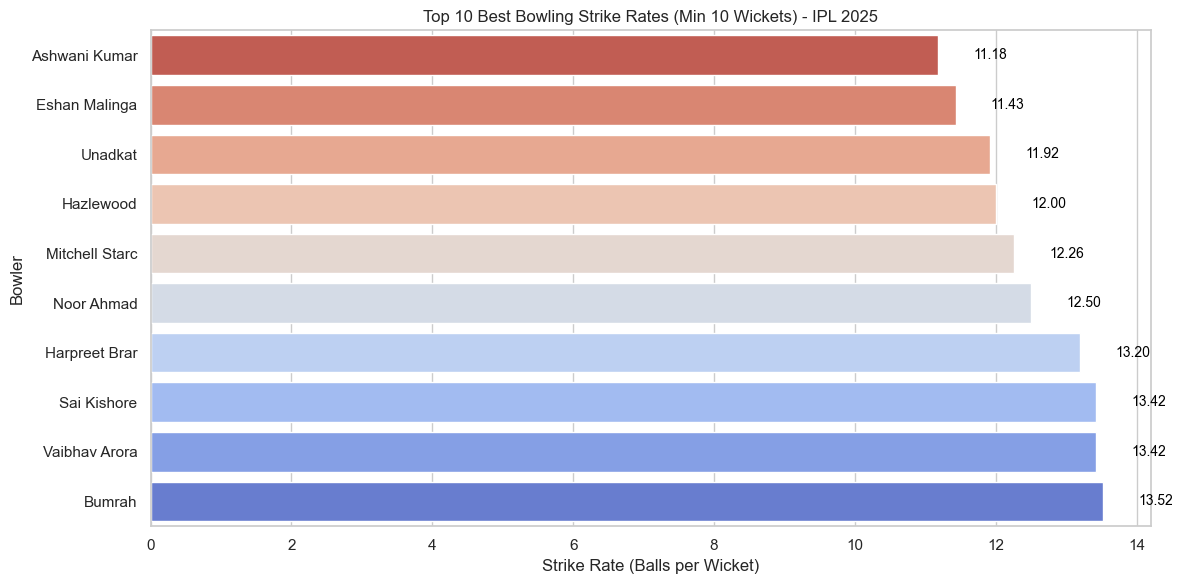

In [14]:
df['wicket'] = df['player_dismissed'].notna().astype(int)
valid_balls = df[(df['wide'].isna() | (df['wide'] == 0)) & (df['noballs'].isna() | (df['noballs'] == 0))]
balls_bowled = valid_balls.groupby('bowler').size().reset_index(name='balls_bowled')
wickets_taken = df.groupby('bowler')['wicket'].sum().reset_index()
bowling_stats = pd.merge(balls_bowled, wickets_taken, on='bowler', how='inner')
min_wickets = 10
bowling_stats = bowling_stats[bowling_stats['wicket'] >= min_wickets]
bowling_stats['strike_rate'] = bowling_stats['balls_bowled'] / bowling_stats['wicket']
best_strike_rate = bowling_stats.sort_values(by='strike_rate').head(10)
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=best_strike_rate, x='strike_rate', y='bowler', palette='coolwarm_r')
for bar in ax.patches:
    plt.text(bar.get_width() + 0.5,
             bar.get_y() + bar.get_height() / 2,
             f"{bar.get_width():.2f}",
             va='center', fontsize=10, color='black')
plt.title('Top 10 Best Bowling Strike Rates (Min 10 Wickets) - IPL 2025')
plt.xlabel('Strike Rate (Balls per Wicket)')
plt.ylabel('Bowler')
plt.tight_layout()
plt.show()

# Top 10 Bowlers with Most Wides - IPL 2025

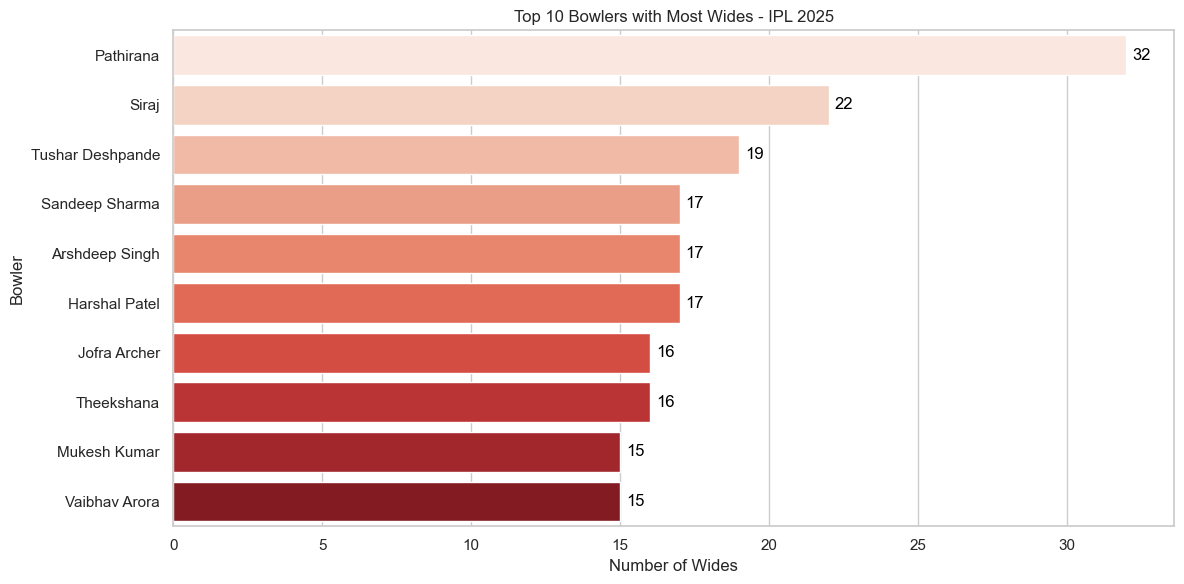

In [15]:
wides = df[df['wide'] > 0]
wides_per_bowler = wides.groupby('bowler').size().reset_index(name='wides')
wides_per_bowler = wides_per_bowler.sort_values(by='wides', ascending=False)
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=wides_per_bowler.head(10), x='wides', y='bowler', palette='Reds')
for bar in ax.patches:
    plt.text(bar.get_width() + 0.2,
             bar.get_y() + bar.get_height() / 2,
             int(bar.get_width()),
             va='center', fontsize=12, color='black')
plt.title('Top 10 Bowlers with Most Wides - IPL 2025')
plt.xlabel('Number of Wides')
plt.ylabel('Bowler')
plt.tight_layout()
plt.show()

# Top 10 Bowlers with Most No-Balls - IPL 2025

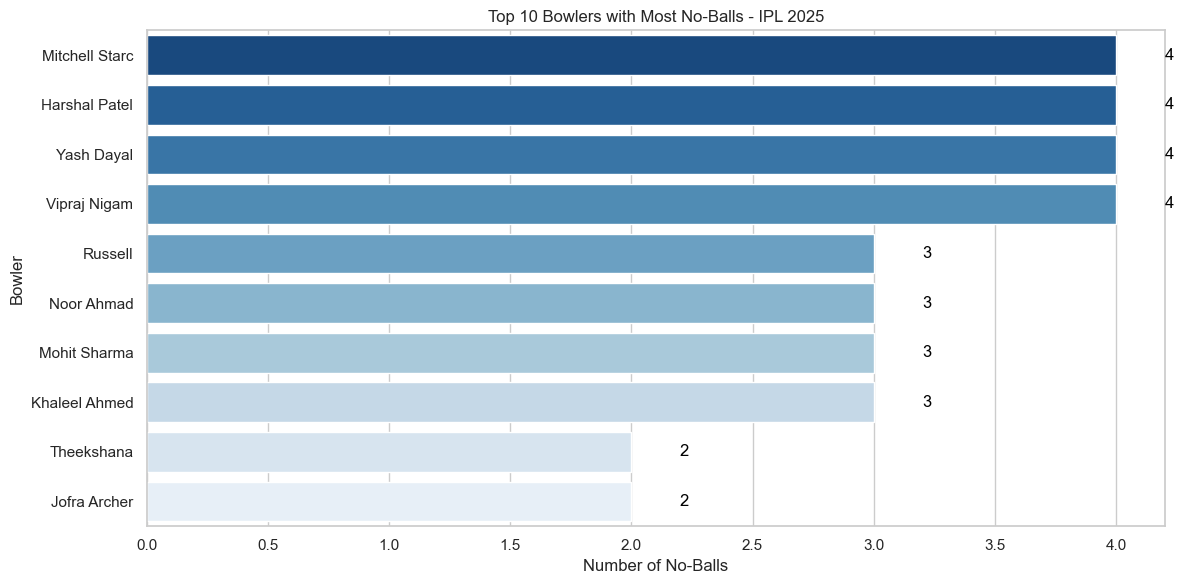

In [16]:
no_balls = df[(df['season'] == 2025) & (df['noballs'] > 0)]
no_balls_per_bowler = no_balls.groupby('bowler').size().reset_index(name='no_balls')
no_balls_per_bowler = no_balls_per_bowler.sort_values(by='no_balls', ascending=False)
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=no_balls_per_bowler.head(10), x='no_balls', y='bowler', palette='Blues_r')
for bar in ax.patches:
    plt.text(bar.get_width() + 0.2,
             bar.get_y() + bar.get_height() / 2,
             int(bar.get_width()),
             va='center', fontsize=12, color='black')
plt.title('Top 10 Bowlers with Most No-Balls - IPL 2025')
plt.xlabel('Number of No-Balls')
plt.ylabel('Bowler')
plt.tight_layout()
plt.show()

# Top 10 Fielders with Most Catches - IPL 2025

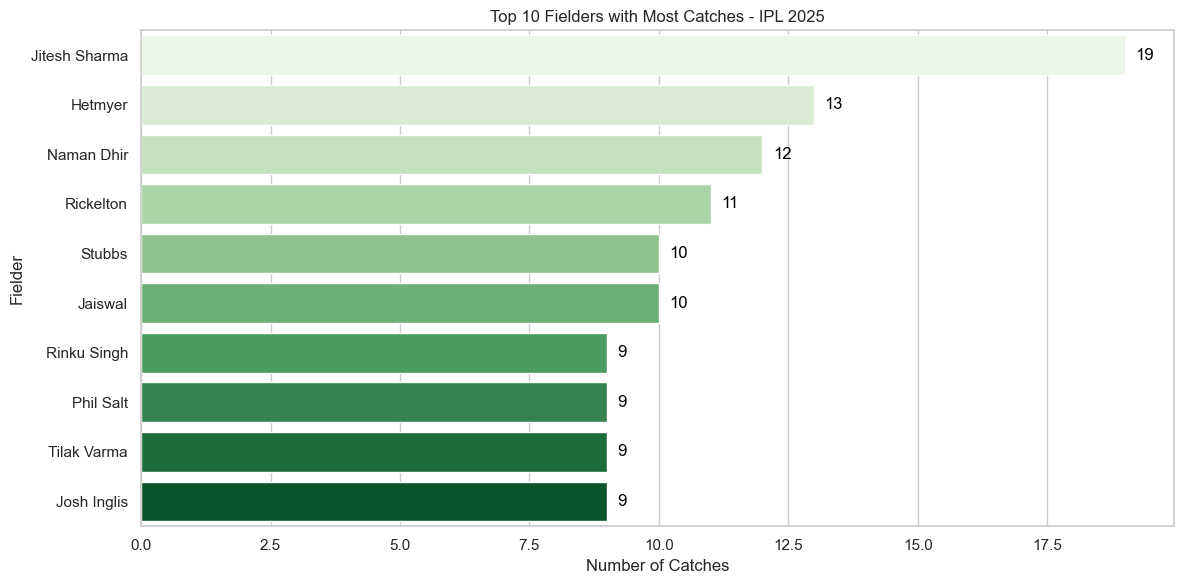

In [17]:
caught_deliveries = df[(df['wicket_type'] == 'caught') & (df['fielder'].notna())]
catch_counts = caught_deliveries['fielder'].value_counts().reset_index()
catch_counts.columns = ['fielder', 'catches']
top_catchers = catch_counts.head(10)
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=top_catchers, x='catches', y='fielder', palette='Greens')
for bar in ax.patches:
    plt.text(bar.get_width() + 0.2,
             bar.get_y() + bar.get_height() / 2,
             int(bar.get_width()),
             va='center', fontsize=12, color='black')
plt.title('Top 10 Fielders with Most Catches - IPL 2025')
plt.xlabel('Number of Catches')
plt.ylabel('Fielder')
plt.tight_layout()
plt.show()

# Top 10 Wicket-Keepers by Total Dismissals (Stumping, Catch, Run Out) - IPL 2025

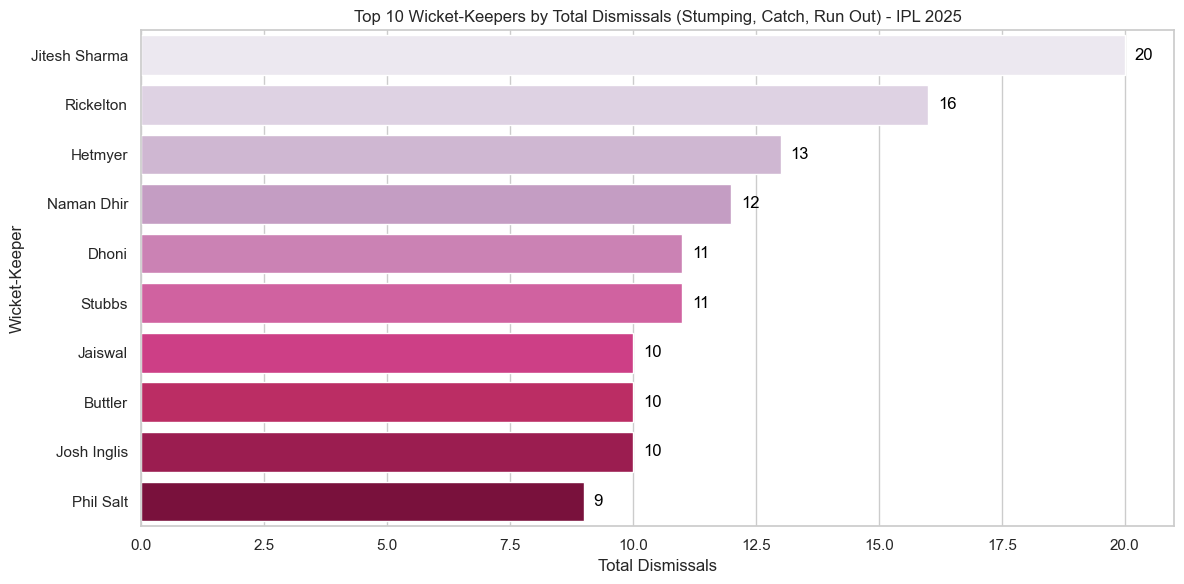

In [18]:
dismissal_types = ['stumped', 'caught', 'run out']
wk_dismissals = df[df['wicket_type'].isin(dismissal_types) & df['fielder'].notna()]
dismissals_count = wk_dismissals['fielder'].value_counts().reset_index()
dismissals_count.columns = ['wicket_keeper', 'total_dismissals']
top_wicket_keepers = dismissals_count.head(10)
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=top_wicket_keepers, x='total_dismissals', y='wicket_keeper', palette='PuRd')
for bar in ax.patches:
    plt.text(bar.get_width() + 0.2,
             bar.get_y() + bar.get_height() / 2,
             int(bar.get_width()),
             va='center', fontsize=12, color='black')
plt.title('Top 10 Wicket-Keepers by Total Dismissals (Stumping, Catch, Run Out) - IPL 2025')
plt.xlabel('Total Dismissals')
plt.ylabel('Wicket-Keeper')
plt.tight_layout()
plt.show()

# Total Runs Scored by Teams - IPL 2025

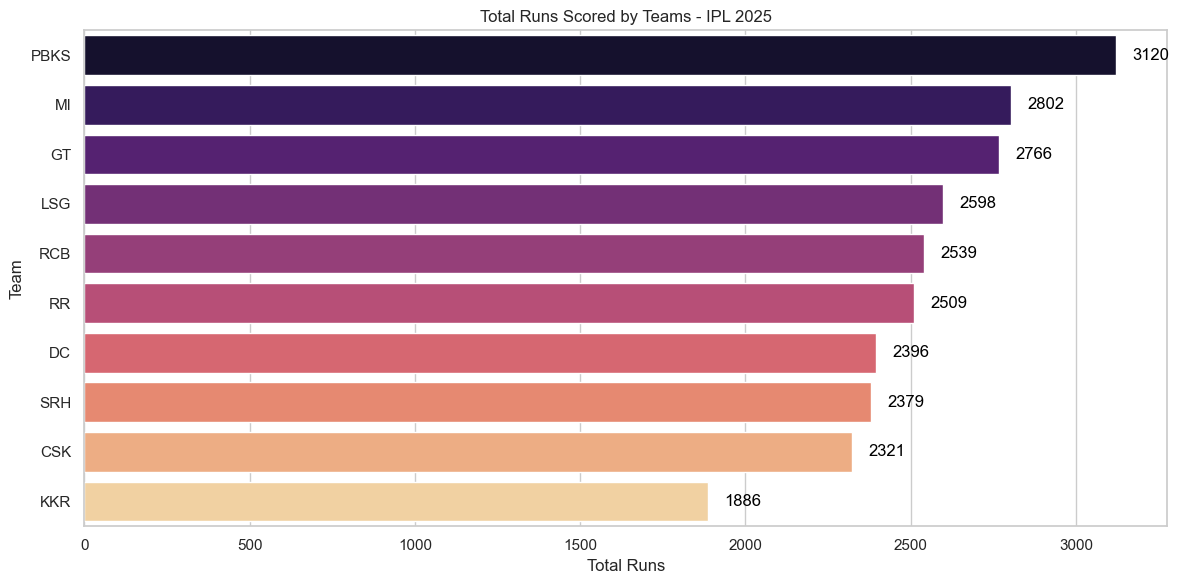

In [19]:
team_runs = df.groupby('batting_team')['runs_of_bat'].sum().reset_index()
team_runs = team_runs.sort_values(by='runs_of_bat', ascending=False)
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=team_runs, x='runs_of_bat', y='batting_team', palette='magma')
for bar in ax.patches:
    plt.text(bar.get_width() + 50,
             bar.get_y() + bar.get_height() / 2,
             int(bar.get_width()),
             va='center', fontsize=12, color='black')
plt.title('Total Runs Scored by Teams - IPL 2025')
plt.xlabel('Total Runs')
plt.ylabel('Team')
plt.tight_layout()
plt.show()

# Most Fours by Teams - IPL 2025

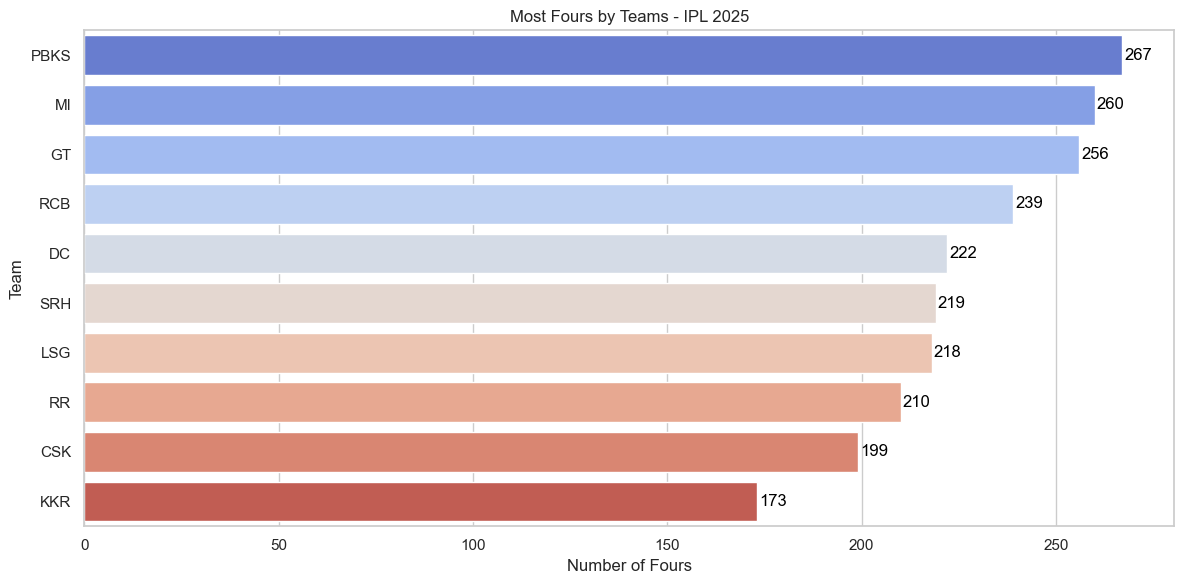

In [20]:
fours = df[df['runs_of_bat'] == 4]
team_fours = fours.groupby('batting_team').size().reset_index(name='fours_count')
team_fours = team_fours.sort_values(by='fours_count', ascending=False)
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=team_fours, x='fours_count', y='batting_team', palette='coolwarm')
for bar in ax.patches:
    plt.text(bar.get_width() + 0.5,
             bar.get_y() + bar.get_height() / 2,
             int(bar.get_width()),
             va='center', fontsize=12, color='black')
plt.title('Most Fours by Teams - IPL 2025')
plt.xlabel('Number of Fours')
plt.ylabel('Team')
plt.tight_layout()
plt.show()

# Most Sixes by Teams - IPL 2025

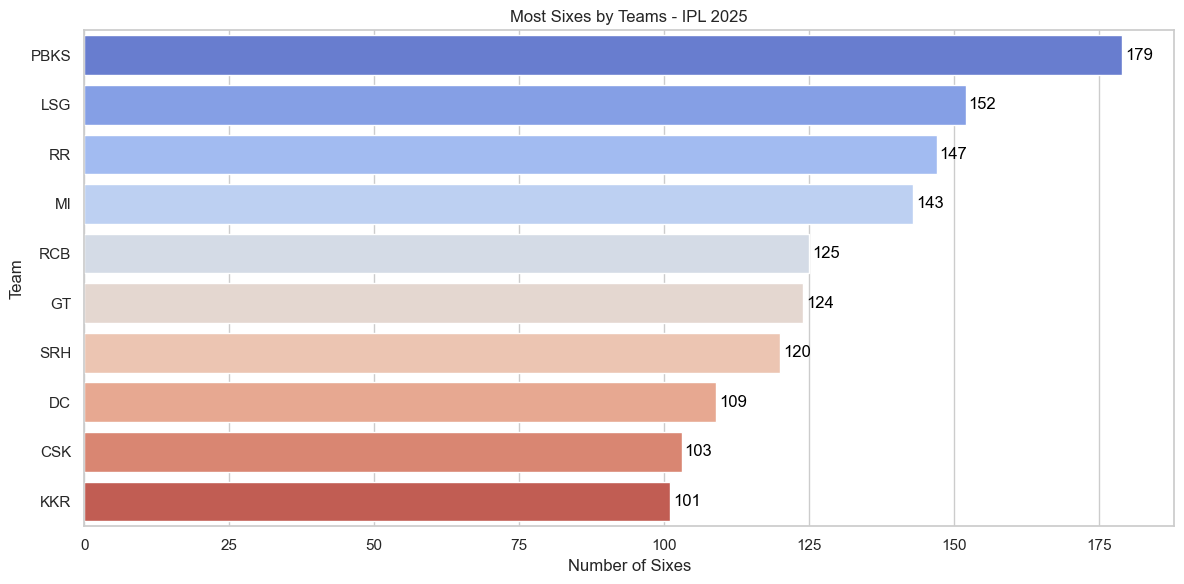

In [21]:
sixes = df[df['runs_of_bat'] == 6]
team_sixes = sixes.groupby('batting_team').size().reset_index(name='sixes_count')
team_sixes = team_sixes.sort_values(by='sixes_count', ascending=False)
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=team_sixes, x='sixes_count', y='batting_team', palette='coolwarm')
for bar in ax.patches:
    plt.text(bar.get_width() + 0.5,
             bar.get_y() + bar.get_height() / 2,
             int(bar.get_width()),
             va='center', fontsize=12, color='black')
plt.title('Most Sixes by Teams - IPL 2025')
plt.xlabel('Number of Sixes')
plt.ylabel('Team')
plt.tight_layout()
plt.show()

# Total Runs Conceded by Teams While Fielding - IPL 2025

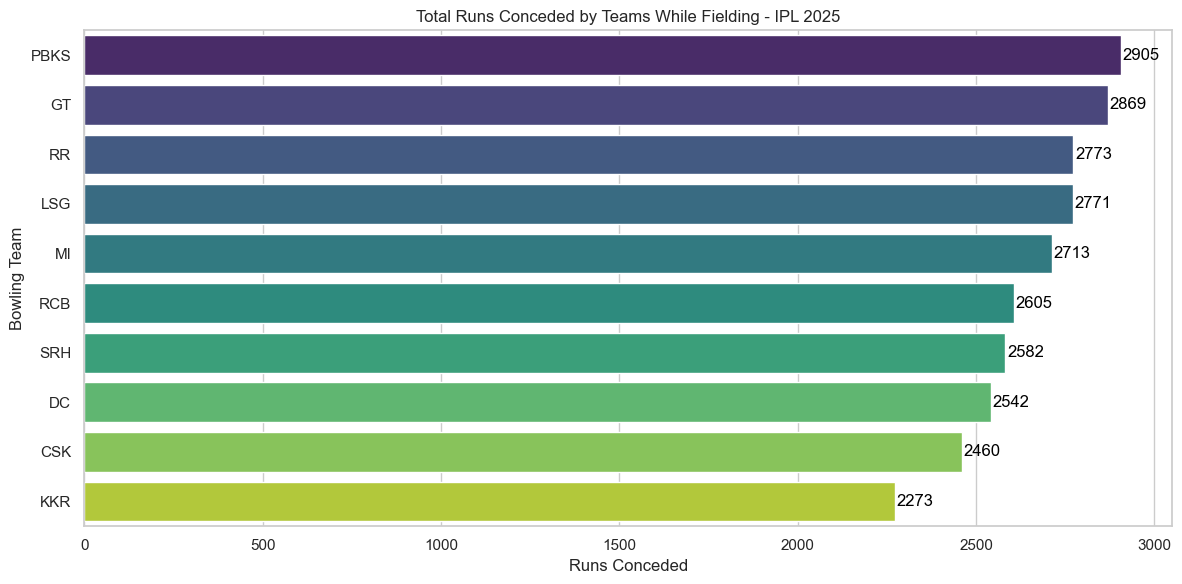

In [22]:
df['total_runs'] = df['runs_of_bat'] + df['extras']
runs_conceded_by_team = df.groupby('bowling_team')['total_runs'].sum().reset_index()
runs_conceded_by_team = runs_conceded_by_team.sort_values(by='total_runs', ascending=False)
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=runs_conceded_by_team, x='total_runs', y='bowling_team', palette='viridis')
for bar in ax.patches:
    plt.text(bar.get_width() + 5,
             bar.get_y() + bar.get_height() / 2,
             int(bar.get_width()),
             va='center', fontsize=12, color='black')
plt.title('Total Runs Conceded by Teams While Fielding - IPL 2025')
plt.xlabel('Runs Conceded')
plt.ylabel('Bowling Team')
plt.tight_layout()
plt.show()

# Most Wickets by Teams - IPL 2025

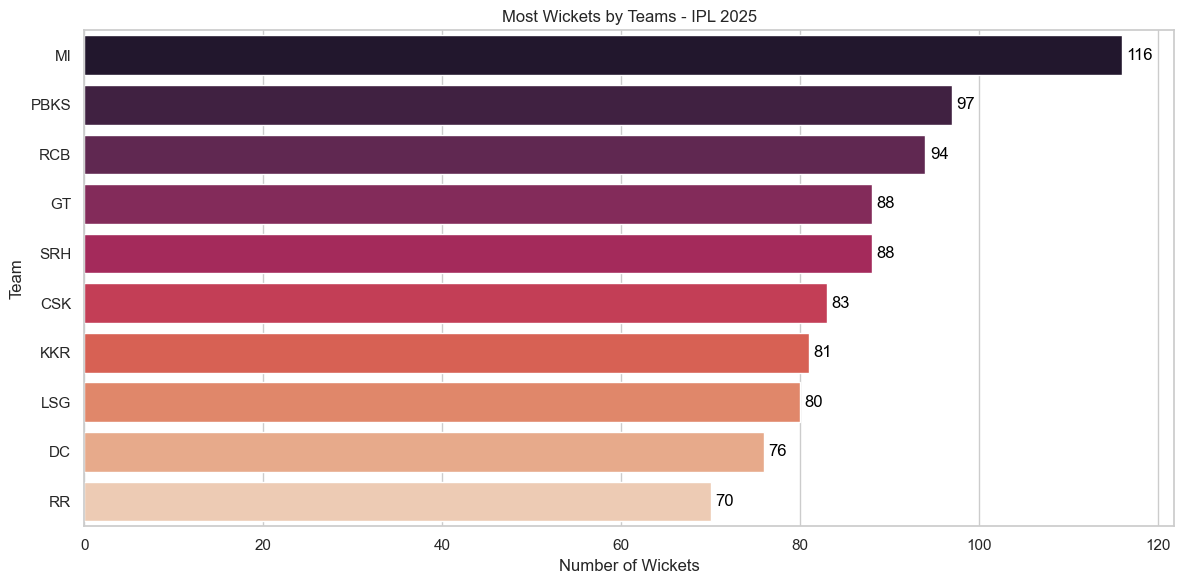

In [23]:
wickets = df[df['player_dismissed'].notna()]
team_wickets = wickets.groupby('bowling_team').size().reset_index(name='wickets')
team_wickets = team_wickets.sort_values(by='wickets', ascending=False)
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=team_wickets, x='wickets', y='bowling_team', palette='rocket')
for bar in ax.patches:
    plt.text(bar.get_width() + 0.5,
             bar.get_y() + bar.get_height() / 2,
             int(bar.get_width()),
             va='center', fontsize=12, color='black')
plt.title('Most Wickets by Teams - IPL 2025')
plt.xlabel('Number of Wickets')
plt.ylabel('Team')
plt.tight_layout()
plt.show()

# Most Wides Bowled by Teams - IPL 2025

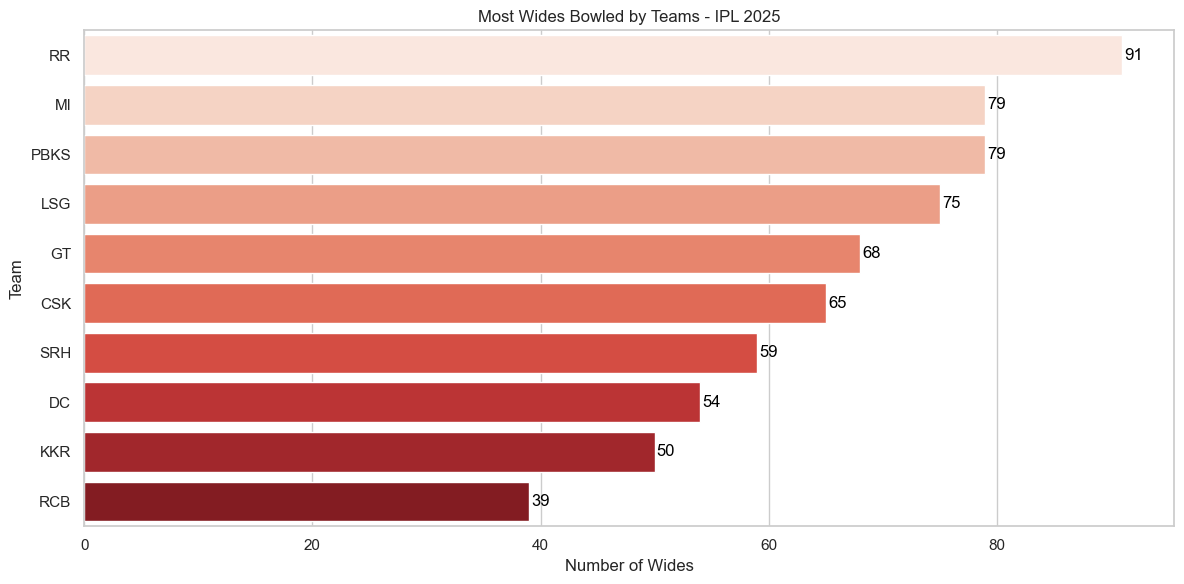

In [24]:
team_wides = df.groupby('bowling_team')['wide'].sum().reset_index()
team_wides = team_wides.sort_values(by='wide', ascending=False)
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=team_wides, x='wide', y='bowling_team', palette='Reds')
for bar in ax.patches:
    plt.text(bar.get_width() + 0.2,
             bar.get_y() + bar.get_height() / 2,
             int(bar.get_width()),
             va='center', fontsize=12, color='black')
plt.title('Most Wides Bowled by Teams - IPL 2025')
plt.xlabel('Number of Wides')
plt.ylabel('Team')
plt.tight_layout()
plt.show()

# Most Catches by Teams - IPL 2025

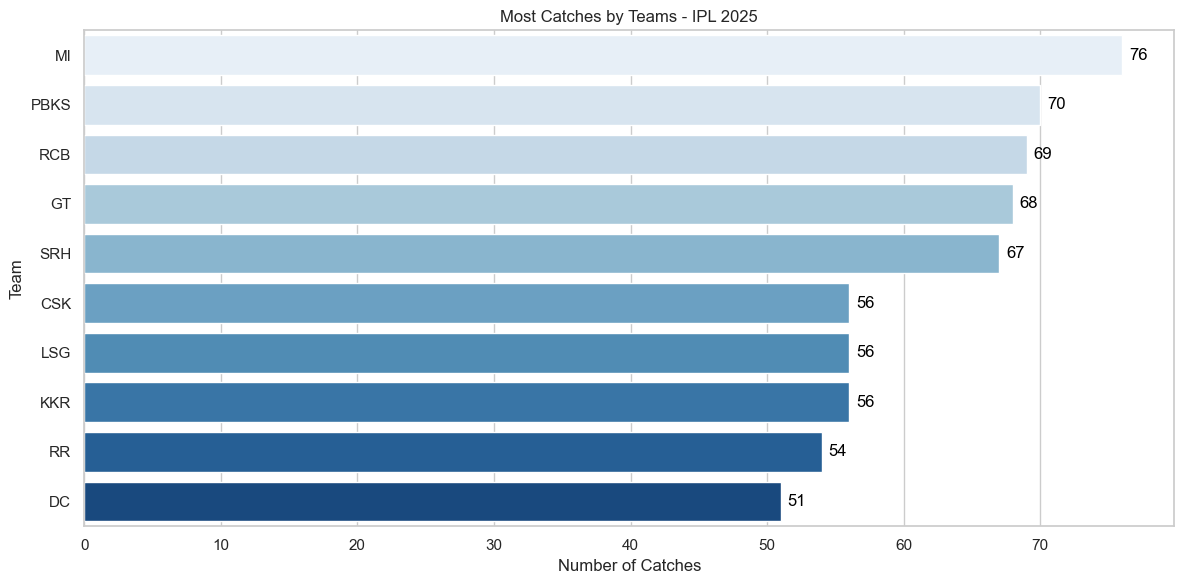

In [25]:
caught_deliveries = df[(df['wicket_type'] == 'caught') & (df['fielder'].notna())]
team_catches = caught_deliveries.groupby('bowling_team').size().reset_index(name='catches')
team_catches = team_catches.sort_values(by='catches', ascending=False)
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=team_catches, x='catches', y='bowling_team', palette='Blues')
for bar in ax.patches:
    plt.text(bar.get_width() + 0.5,
             bar.get_y() + bar.get_height() / 2,
             int(bar.get_width()),
             va='center', fontsize=12, color='black')
plt.title('Most Catches by Teams - IPL 2025')
plt.xlabel('Number of Catches')
plt.ylabel('Team')
plt.tight_layout()
plt.show()

# Top 10 Batting Friendly Venues (Avg Runs per Match) - IPL 2025

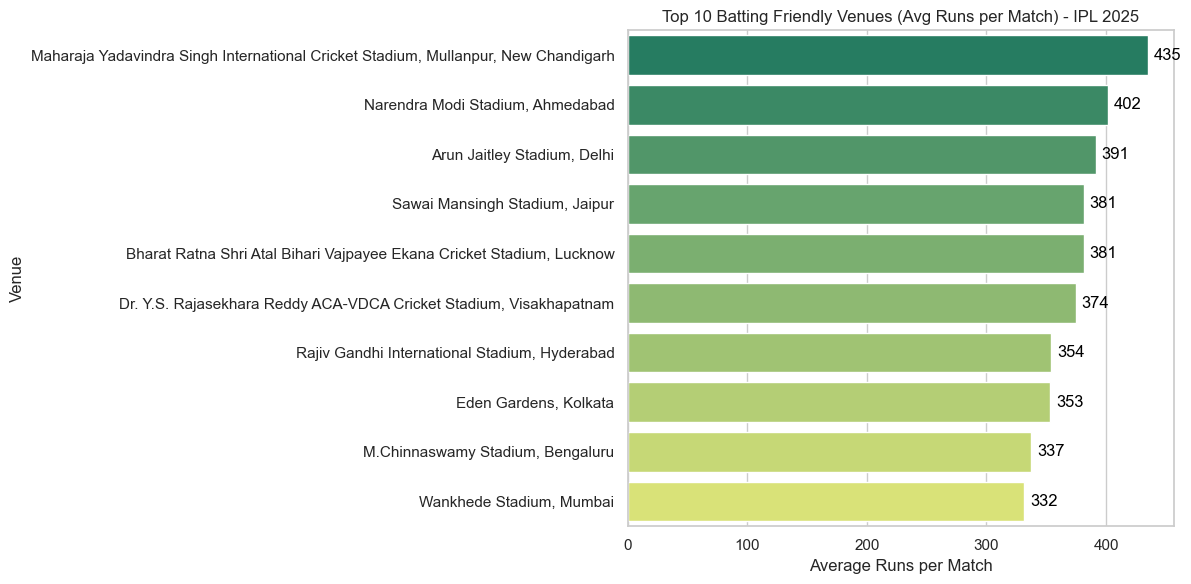

In [26]:
df['total_runs'] = df['runs_of_bat'] + df['extras']
runs_per_venue = df.groupby('venue')['total_runs'].sum().reset_index()
matches_per_venue = df.groupby('venue')['match_id'].nunique().reset_index(name='matches')
venue_stats = runs_per_venue.merge(matches_per_venue, on='venue')
venue_stats['avg_runs_per_match'] = venue_stats['total_runs'] / venue_stats['matches']
venue_stats = venue_stats.sort_values(by='avg_runs_per_match', ascending=False)
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=venue_stats.head(10), x='avg_runs_per_match', y='venue', palette='summer')
for bar in ax.patches:
    plt.text(bar.get_width() + 5,
             bar.get_y() + bar.get_height() / 2,
             f"{bar.get_width():.0f}",
             va='center', fontsize=12, color='black')
plt.title('Top 10 Batting Friendly Venues (Avg Runs per Match) - IPL 2025')
plt.xlabel('Average Runs per Match')
plt.ylabel('Venue')
plt.tight_layout()
plt.show()

# Top 10 Bowling Friendly Venues (Lowest Avg Runs Conceded per Match) - IPL 2025

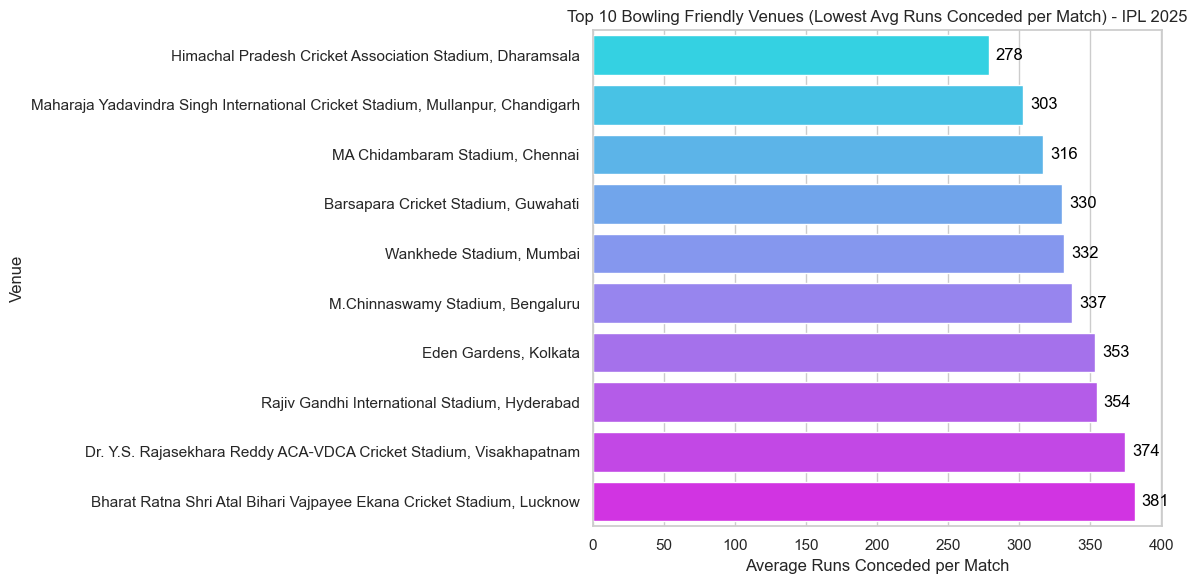

In [27]:
df['total_runs'] = df['runs_of_bat'] + df['extras']
runs_per_venue = df.groupby('venue')['total_runs'].sum().reset_index()
matches_per_venue = df.groupby('venue')['match_id'].nunique().reset_index(name='matches')
venue_stats = runs_per_venue.merge(matches_per_venue, on='venue')
venue_stats['avg_runs_conceded_per_match'] = venue_stats['total_runs'] / venue_stats['matches']
venue_stats = venue_stats.sort_values(by='avg_runs_conceded_per_match')
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=venue_stats.head(10), x='avg_runs_conceded_per_match', y='venue', palette='cool')
for bar in ax.patches:
    plt.text(bar.get_width() + 5,
             bar.get_y() + bar.get_height() / 2,
             f"{bar.get_width():.0f}",
             va='center', fontsize=12, color='black')
plt.title('Top 10 Bowling Friendly Venues (Lowest Avg Runs Conceded per Match) - IPL 2025')
plt.xlabel('Average Runs Conceded per Match')
plt.ylabel('Venue')
plt.tight_layout()
plt.show()

# Top 10 Less Wicket-Friendly Venues (Avg Wickets per Match) - IPL 2025

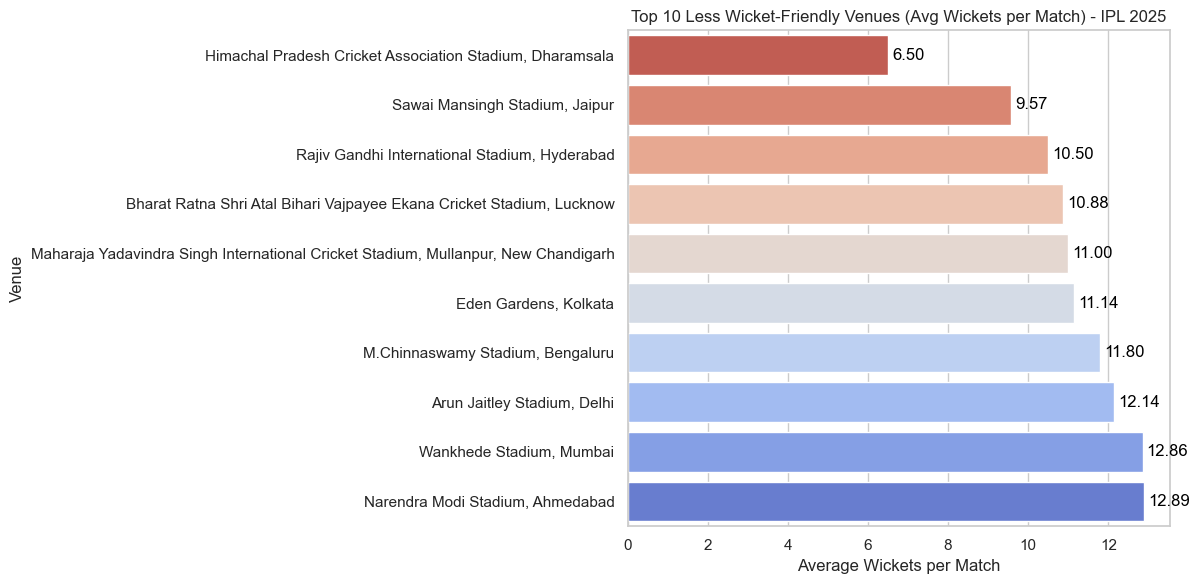

In [28]:
wickets = df[df['wicket_type'].notna() & (df['wicket_type'] != '')]
wickets_per_venue = wickets.groupby('venue').size().reset_index(name='wickets')
matches_per_venue = df.groupby('venue')['match_id'].nunique().reset_index(name='matches')
venue_wicket_stats = wickets_per_venue.merge(matches_per_venue, on='venue')
venue_wicket_stats['avg_wickets_per_match'] = venue_wicket_stats['wickets'] / venue_wicket_stats['matches']
venue_wicket_stats = venue_wicket_stats.sort_values(by='avg_wickets_per_match', ascending=True)
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=venue_wicket_stats.head(10), x='avg_wickets_per_match', y='venue', palette='coolwarm_r')
for bar in ax.patches:
    plt.text(bar.get_width() + 0.1,
             bar.get_y() + bar.get_height() / 2,
             f"{bar.get_width():.2f}",
             va='center', fontsize=12, color='black')
plt.title('Top 10 Less Wicket-Friendly Venues (Avg Wickets per Match) - IPL 2025')
plt.xlabel('Average Wickets per Match')
plt.ylabel('Venue')
plt.tight_layout()
plt.show()

# Top 10 More Wicket-Friendly Venues (Avg Wickets per Match) - IPL 2025

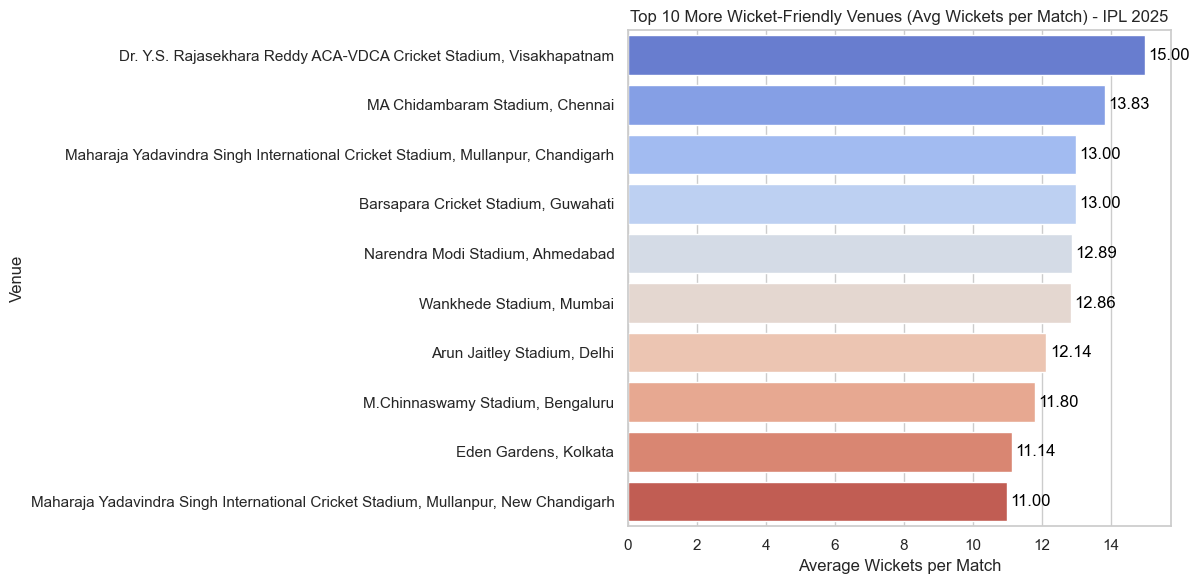

In [29]:
wickets = df[df['wicket_type'].notna() & (df['wicket_type'] != '')]
wickets_per_venue = wickets.groupby('venue').size().reset_index(name='wickets')
matches_per_venue = df.groupby('venue')['match_id'].nunique().reset_index(name='matches')
venue_wicket_stats = wickets_per_venue.merge(matches_per_venue, on='venue')
venue_wicket_stats['avg_wickets_per_match'] = venue_wicket_stats['wickets'] / venue_wicket_stats['matches']
venue_wicket_stats = venue_wicket_stats.sort_values(by='avg_wickets_per_match', ascending=False)
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=venue_wicket_stats.head(10), x='avg_wickets_per_match', y='venue', palette='coolwarm')
for bar in ax.patches:
    plt.text(bar.get_width() + 0.1,
             bar.get_y() + bar.get_height() / 2,
             f"{bar.get_width():.2f}",
             va='center', fontsize=12, color='black')
plt.title('Top 10 More Wicket-Friendly Venues (Avg Wickets per Match) - IPL 2025')
plt.xlabel('Average Wickets per Match')
plt.ylabel('Venue')
plt.tight_layout()
plt.show()